# Business Problem 

In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
path = r"C:\Users\rohan\ML-project\student mark prediction\student_info.csv"
df = pd.read_csv(path)

In [5]:
df.head(10)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [6]:
df.tail(10)

,study_hours,student_marks
190,5.79,73.14
191,5.22,70.51
192,8.71,84.03
193,7.55,79.64
194,6.35,74.24
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
df.shape

(200, 2)

# Discover and visualize the data to gain insights

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


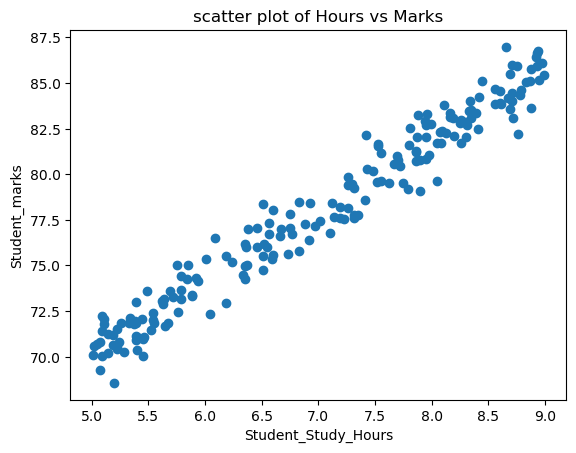

In [10]:
plt.scatter(x =df.study_hours,y = df.student_marks)
plt.xlabel("Student_Study_Hours")
plt.ylabel("Student_marks")
plt.title("scatter plot of Hours vs Marks")
plt.show()

# Prepare the data for machine learning algorithms

In [11]:
# data cleaning 

In [12]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [13]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [14]:
df2 = df.fillna(df.mean())

In [15]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [16]:
df2.head(10)

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
5,7.550000,81.18
6,6.670000,76.99
7,8.990000,85.46
8,5.190000,70.66
9,6.750000,77.82


In [17]:
# split dataset

In [18]:
X = df2.drop("student_marks",axis="columns")
y = df2.drop("study_hours",axis="columns")

In [19]:
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [20]:
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=51)

In [23]:
X_train.shape

(140, 1)

In [24]:
X_test.shape

(60, 1)

In [25]:
y_train.shape

(140, 1)

In [26]:
y_test.shape

(60, 1)

# Select a model and train it

In [27]:
# y = m * x + c

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
lr.coef_

array([[3.9391835]])

In [31]:
lr.intercept_

array([50.47174682])

In [32]:
m = 3.93
c = 50.44
y = m*4+c

In [33]:
y

66.16

In [34]:
lr.predict([[4]])[0][0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.22848080710745

In [35]:
y_pred = lr.predict(X_test)

In [36]:
y_pred

array([[83.16696985],
       [78.95204351],
       [84.62446774],
       [85.88500646],
       [84.78203508],
       [80.80345975],
       [72.88570092],
       [71.70394587],
       [73.27961927],
       [71.70394587],
       [73.51597028],
       [76.43096607],
       [73.27961927],
       [73.63414578],
       [83.00940251],
       [70.44340715],
       [73.27961927],
       [78.79447617],
       [75.60373753],
       [82.73365966],
       [76.70670891],
       [70.52219082],
       [74.81590083],
       [78.03007256],
       [85.64865545],
       [82.61548416],
       [76.4703579 ],
       [85.09716976],
       [78.43994965],
       [81.43372911],
       [81.78825562],
       [83.20636168],
       [82.26095764],
       [81.15798626],
       [73.63414578],
       [71.19185201],
       [71.94029688],
       [81.59129645],
       [72.64934991],
       [71.97968871],
       [70.91610917],
       [81.94582296],
       [80.88224342],
       [83.16696985],
       [85.45169628],
       [77

In [37]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns = ["study_hours","student_marks_original","student_marks_predict"])

,study_hours,student_marks_original,student_marks_predict
0,8.300000,82.02,83.166970
1,7.230000,77.55,78.952044
2,8.670000,84.19,84.624468
3,8.990000,85.46,85.885006
4,8.710000,84.03,84.782035
5,7.700000,80.81,80.803460
6,5.690000,73.61,72.885701
7,5.390000,70.90,71.703946
8,5.790000,73.14,73.279619
9,5.390000,73.02,71.703946


# Fine-tune your model

In [38]:
lr.score(X_test,y_test)

0.9524931690615001

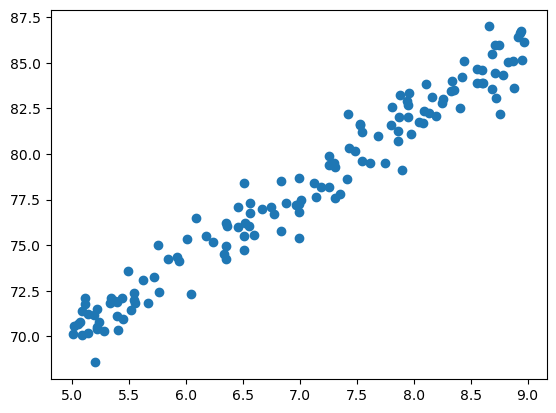

In [39]:
plt.scatter(X_train,y_train)

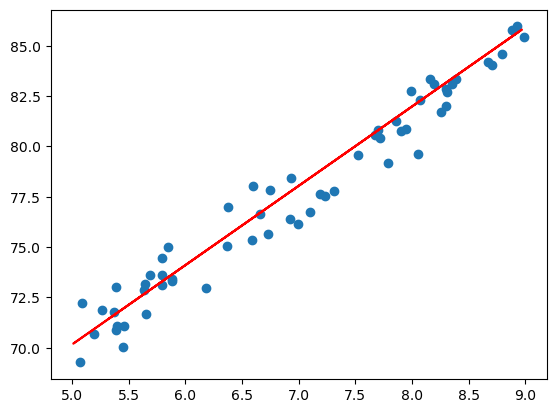

In [40]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train), color="r")

# present your solution

# save ML model

In [41]:
import joblib
joblib.dump(lr,"Student_mark_predictor_model.pkl")

['Student_mark_predictor_model.pkl']

In [42]:
model = joblib.load("Student_mark_predictor_model.pkl")

In [43]:
model.predict([[5]])[0][0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.16766430501457

# Launch,Monitor and Maintain your system

In [76]:
# go to pycharm